In [1]:
! pip install seaborn
! pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 1.3 MB/s eta 0:00:01
   ----------------- ---------------------- 112.6/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
import sklearn
import imblearn
import statistics

from sklearn import preprocessing

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [4]:
# get option to get maximum columns displayed
pd.set_option("display.max_columns", None)

df = pd.read_csv("audio_feature_file.csv")
#df.head(5)
df = df.drop("Unnamed: 0",axis=1)
print(df.shape)
df.tail(5)

(1441, 50)


,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfccs_coef1,mfccs_coef2,mfccs_coef3,mfccs_coef4,mfccs_coef5,mfccs_coef6,mfccs_coef7,mfccs_coef8,mfccs_coef9,mfccs_coef10,mfccs_coef11,mfccs_coef12,mfccs_coef13,mfccs_coef14,mfccs_coef15,mfccs_coef16,mfccs_coef17,mfccs_coef18,mfccs_coef19,mfccs_coef20,mfccs_coef21,mfccs_coef22,mfccs_coef23,mfccs_coef24,mfccs_coef25,mfccs_coef26,mfccs_coef27,mfccs_coef28,mfccs_coef29,mfccs_coef30,mfccs_coef31,mfccs_coef32,mfccs_coef33,mfccs_coef34,mfccs_coef35,mfccs_coef36,mfccs_coef37,mfccs_coef38,mfccs_coef39,mfccs_coef20.1,tempo,audio_path,offset,target
1436,0.498937,-0.318719,-0.411002,-0.536867,-0.398209,0.065225,0.447208,-0.635838,0.226622,0.338572,0.092794,0.718460,0.397468,-0.132323,0.110891,0.771328,1.301402,0.372492,0.668387,1.671337,0.085648,1.255451,1.715116,0.431215,-0.544725,0.870119,-0.134258,0.199518,-0.932032,0.095067,-1.038292,0.276705,-0.264256,0.405995,-2.114281,1.923355,-0.649039,0.123364,-0.284442,1.399285,-1.039307,0.612488,-0.978548,0.518016,-0.684852,0.375386,-0.820806,.\Data\set_b\normal_noisynormal_207_1308159792...,0.232875,4
1437,0.464056,0.889604,-0.398484,-0.532188,-0.371951,-0.238509,0.967754,-0.569690,-0.676291,0.957047,0.203693,0.711382,0.354122,0.628172,-0.134801,0.240356,0.283473,0.785550,-0.010825,0.292482,-0.261636,0.576187,-0.083294,0.834704,0.869729,0.570012,-0.521703,0.328774,-0.565663,-0.030010,-0.609275,-0.602061,-0.843860,0.056063,-0.418183,-1.370611,-1.803926,0.389762,-0.093895,-0.828572,-0.541549,-0.369674,-0.662987,-0.724205,-1.173786,-0.581351,0.373084,.\Data\set_b\normal_noisynormal_258_1309352253...,22.433500,4
1438,0.628104,0.128634,-0.460393,-0.604801,-0.473231,-0.501766,0.361546,0.832576,0.863622,0.685102,-0.957707,0.168042,0.194981,1.279352,0.644362,0.754003,-0.147743,-0.069619,-0.041940,-0.695486,0.042631,-0.464406,0.681345,0.772008,0.856790,-0.403366,-0.025409,-0.194280,-0.932058,-0.836112,-1.615290,-0.819550,-1.410399,-1.599447,-0.438232,-0.582979,-0.312800,-0.718319,-1.023868,-1.217438,0.271298,0.166826,-0.162057,-0.248806,-0.407037,-0.139921,0.373084,.\Data\set_b\normal__146_1306778707532_D2.wav,6.103625,4
1439,0.267381,-0.817976,-0.328222,-0.504859,-0.303054,0.907396,0.161114,-0.966251,-0.483708,-0.082967,-1.121816,-0.286700,-1.340354,0.369944,-0.303330,0.235399,-0.573341,0.131064,0.600783,0.156821,-0.127979,0.180840,1.026634,0.417814,0.665674,-0.208418,0.017086,0.431596,0.123969,0.400838,0.291731,0.416836,0.127756,0.373448,0.316380,1.080813,0.339808,0.151257,1.096730,-0.176740,0.121633,-0.060523,-0.015905,-0.138844,0.201901,0.348236,-0.555497,.\Data\set_b\normal_noisynormal_121_1306263877...,4.621625,4
1440,0.514716,1.041137,-0.402633,-0.536656,-0.378389,-0.265435,0.966130,-0.514015,-0.723799,1.054846,0.209464,0.886781,0.359335,0.639822,-0.130419,0.383431,0.349619,0.667478,-0.046053,0.256879,-0.065567,0.741665,-0.238515,0.677525,0.261818,0.584922,-0.366442,0.517609,-0.295649,0.113174,-0.474835,-0.398776,-0.912399,0.064132,-0.877669,-0.815152,-1.603433,-0.134915,-0.743681,-1.061986,-0.925993,-0.690883,-0.352451,-0.780423,-0.611589,-0.399786,-1.019788,.\Data\set_b\normal_noisynormal_258_1309352253...,14.433500,4


In [5]:
df.info()
#df.drop("target",axis=1)
maps = {0 : "Artifact",
                     1 : "Extra HS",
                     2 : "Extrasystol",
                     3 : "Murmur",
                     4 : "Normal"}
df["targets"] = df["target"].map(maps)
target = df["targets"].values
df = df.drop("target",axis=1)
print(np.unique(target,return_counts=True))

'''artifact,0
extrahls,1
extrastole,2
murmur,3
normal,4'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chroma_stft_mean  1441 non-null   float64
 1   rmse_mean         1441 non-null   float64
 2   spec_cent_mean    1441 non-null   float64
 3   spec_bw_mean      1441 non-null   float64
 4   rolloff_mean      1441 non-null   float64
 5   zcr_mean          1441 non-null   float64
 6   mfccs_coef1       1441 non-null   float64
 7   mfccs_coef2       1441 non-null   float64
 8   mfccs_coef3       1441 non-null   float64
 9   mfccs_coef4       1441 non-null   float64
 10  mfccs_coef5       1441 non-null   float64
 11  mfccs_coef6       1441 non-null   float64
 12  mfccs_coef7       1441 non-null   float64
 13  mfccs_coef8       1441 non-null   float64
 14  mfccs_coef9       1441 non-null   float64
 15  mfccs_coef10      1441 non-null   float64
 16  mfccs_coef11      1441 non-null   float64


'artifact,0\nextrahls,1\nextrastole,2\nmurmur,3\nnormal,4'

In [8]:
# Normalization
df = df.drop("audio_path", axis=1)
f1 = df.iloc[:,:]
f2 = preprocessing.StandardScaler().fit_transform(f1)
f2 = np.array(f2)
df2 = pd.DataFrame(data = f2,columns = df.columns)
#df2=df2.drop("target",axis=1)
#df2["target"] = target
df2.tail()

,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfccs_coef1,mfccs_coef2,mfccs_coef3,mfccs_coef4,mfccs_coef5,mfccs_coef6,mfccs_coef7,mfccs_coef8,mfccs_coef9,mfccs_coef10,mfccs_coef11,mfccs_coef12,mfccs_coef13,mfccs_coef14,mfccs_coef15,mfccs_coef16,mfccs_coef17,mfccs_coef18,mfccs_coef19,mfccs_coef20,mfccs_coef21,mfccs_coef22,mfccs_coef23,mfccs_coef24,mfccs_coef25,mfccs_coef26,mfccs_coef27,mfccs_coef28,mfccs_coef29,mfccs_coef30,mfccs_coef31,mfccs_coef32,mfccs_coef33,mfccs_coef34,mfccs_coef35,mfccs_coef36,mfccs_coef37,mfccs_coef38,mfccs_coef39,mfccs_coef20.1,tempo,offset
1436,0.498937,-0.318719,-0.411002,-0.536867,-0.398209,0.065225,0.447208,-0.635838,0.226622,0.338572,0.092794,0.718460,0.397468,-0.132323,0.110891,0.771328,1.301402,0.372492,0.668387,1.671337,0.085648,1.255451,1.715116,0.431215,-0.544725,0.870119,-0.134258,0.199518,-0.932032,0.095067,-1.038292,0.276705,-0.264256,0.405995,-2.114281,1.923355,-0.649039,0.123364,-0.284442,1.399285,-1.039307,0.612488,-0.978548,0.518016,-0.684852,0.375386,-0.820806,-0.981876
1437,0.464056,0.889604,-0.398484,-0.532188,-0.371951,-0.238509,0.967754,-0.569690,-0.676291,0.957047,0.203693,0.711382,0.354122,0.628172,-0.134801,0.240356,0.283473,0.785550,-0.010825,0.292482,-0.261636,0.576187,-0.083294,0.834704,0.869729,0.570012,-0.521703,0.328774,-0.565663,-0.030010,-0.609275,-0.602061,-0.843860,0.056063,-0.418183,-1.370611,-1.803926,0.389762,-0.093895,-0.828572,-0.541549,-0.369674,-0.662987,-0.724205,-1.173786,-0.581351,0.373084,5.491207
1438,0.628104,0.128634,-0.460393,-0.604801,-0.473231,-0.501766,0.361546,0.832576,0.863622,0.685102,-0.957707,0.168042,0.194981,1.279352,0.644362,0.754003,-0.147743,-0.069619,-0.041940,-0.695486,0.042631,-0.464406,0.681345,0.772008,0.856790,-0.403366,-0.025409,-0.194280,-0.932058,-0.836112,-1.615290,-0.819550,-1.410399,-1.599447,-0.438232,-0.582979,-0.312800,-0.718319,-1.023868,-1.217438,0.271298,0.166826,-0.162057,-0.248806,-0.407037,-0.139921,0.373084,0.729871
1439,0.267381,-0.817976,-0.328222,-0.504859,-0.303054,0.907396,0.161114,-0.966251,-0.483708,-0.082967,-1.121816,-0.286700,-1.340354,0.369944,-0.303330,0.235399,-0.573341,0.131064,0.600783,0.156821,-0.127979,0.180840,1.026634,0.417814,0.665674,-0.208418,0.017086,0.431596,0.123969,0.400838,0.291731,0.416836,0.127756,0.373448,0.316380,1.080813,0.339808,0.151257,1.096730,-0.176740,0.121633,-0.060523,-0.015905,-0.138844,0.201901,0.348236,-0.555497,0.297761
1440,0.514716,1.041137,-0.402633,-0.536656,-0.378389,-0.265435,0.966130,-0.514015,-0.723799,1.054846,0.209464,0.886781,0.359335,0.639822,-0.130419,0.383431,0.349619,0.667478,-0.046053,0.256879,-0.065567,0.741665,-0.238515,0.677525,0.261818,0.584922,-0.366442,0.517609,-0.295649,0.113174,-0.474835,-0.398776,-0.912399,0.064132,-0.877669,-0.815152,-1.603433,-0.134915,-0.743681,-1.061986,-0.925993,-0.690883,-0.352451,-0.780423,-0.611589,-0.399786,-1.019788,3.158630


In [9]:
# Feature Selection by information gain using Extra tree classifier
X = df2.iloc[:,:]
print(X.shape)
clf = ExtraTreesClassifier(n_estimators=50,random_state =0)
clf = clf.fit(X, target)
print(clf.feature_importances_)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(1441, 48)
[0.02427296 0.02625104 0.02846388 0.04348986 0.03896694 0.02338234
 0.03297327 0.02850151 0.03851237 0.02069827 0.02556675 0.03695994
 0.02279787 0.03416079 0.02011518 0.03633639 0.02291782 0.01968249
 0.02320019 0.01568823 0.01709049 0.01559402 0.01644798 0.0164575
 0.01632873 0.01683341 0.01941862 0.0182497  0.01889922 0.01657791
 0.01426431 0.01750563 0.0139657  0.01458302 0.01725646 0.01541899
 0.01248639 0.01541286 0.01235888 0.01369977 0.01402449 0.01983781
 0.01818566 0.01419949 0.01454452 0.01427528 0.01875224 0.00439281]
(1441, 16)


In [10]:

x_train,x_test,y_train,y_test = train_test_split(X_new,target,test_size=0.30,random_state=0,stratify = target)

x_train1,x_test1,y_train,y_test = train_test_split(X,target,test_size=0.30,random_state=0,stratify = target)

In [11]:
# Balanciong the data using smote oversampling

smote = SMOTE(sampling_strategy = "not majority",random_state = 0)
print("before oversampling",np.unique(y_train,return_counts=True))
x_train2, y_train2 = smote.fit_resample(x_train, y_train)
print("after oversampling",np.unique(y_train2,return_counts=True))
x_train3, y_train3 = smote.fit_resample(x_train1, y_train)

before oversampling (array(['Artifact', 'Extra HS', 'Extrasystol', 'Murmur', 'Normal'],
      dtype=object), array([112,  36,  61, 261, 538], dtype=int64))
after oversampling (array(['Artifact', 'Extra HS', 'Extrasystol', 'Murmur', 'Normal'],
      dtype=object), array([538, 538, 538, 538, 538], dtype=int64))


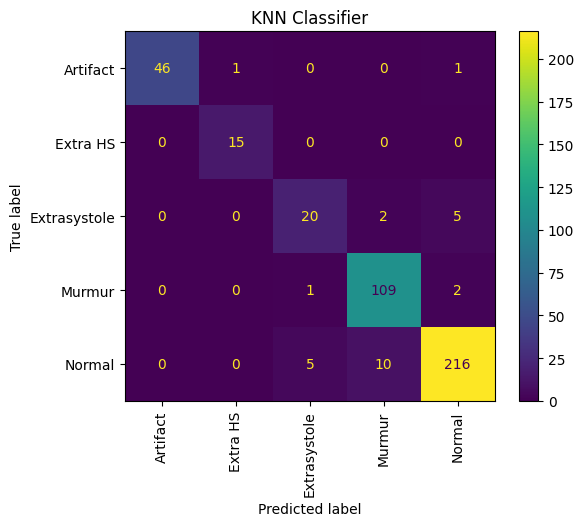

Accuracy is : 93.76%
F1_score of 
 [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:   [0.98 0.97 0.75 0.94 0.95]
Precision score of 
 [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:   [1.   0.94 0.77 0.9  0.96]
Recall score of 
 [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:   [0.96 1.   0.74 0.97 0.94]


In [12]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(x_train2, y_train2)
y_pred_1 = model_1.predict(x_test)

cm = confusion_matrix(y_test, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Artifact", "Extra HS", "Extrasystole", "Murmur", "Normal"])

disp.plot(xticks_rotation="vertical")
plt.title("KNN Classifier")
plt.show()


model_1_accuracy = accuracy_score(y_test, y_pred_1)*100
print("Accuracy is :","{0:.2f}%".format(model_1_accuracy))

f1score = f1_score(y_test, y_pred_1, average=None)
print("F1_score of \n [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:  ",np.round(f1score,2))

precision = precision_score(y_test, y_pred_1, average=None)
print("Precision score of \n [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:  ",np.round(precision,2))

recall = recall_score(y_test, y_pred_1, average=None)
print("Recall score of \n [Artifact, Extra Heart Sound, Extrasystole, Murmur, Normal] categories are:  ",np.round(recall,2))